In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('./diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()
# -> 결측치가 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
feature_columns=df.columns[0:-1].tolist()

In [9]:
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# ------

In [10]:
cols=feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
df[cols]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [12]:
df_null=df[cols].replace(0,np.nan)
df_null=df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

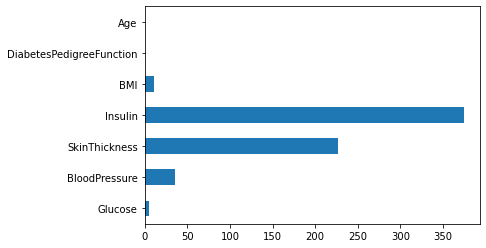

In [13]:
df_null.sum().plot.barh()

<AxesSubplot:>

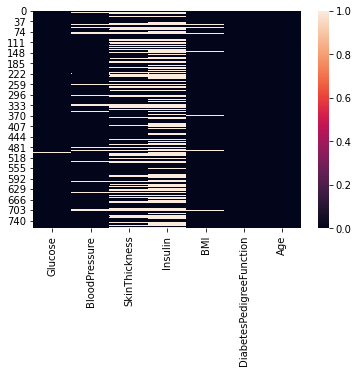

In [14]:
sns.heatmap(df_null)
# 0 or1 이기때문에그럼. 1은 결측치

# ------

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [18]:
df.groupby(['Pregnancies'])['Outcome'].mean()
# 임신횟수가 많아질수록 당뇨병 발병확률이 높아짐

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [19]:
df_po=df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

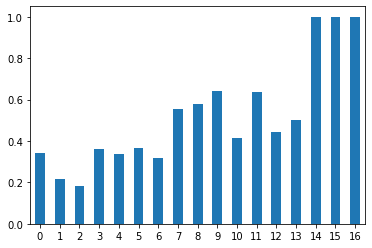

In [22]:
df_po['mean'].plot.bar(rot=0)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

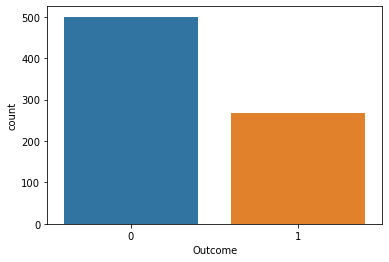

In [23]:
sns.countplot(data=df,x='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

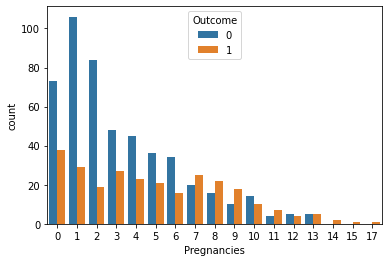

In [24]:
sns.countplot(data=df,x='Pregnancies',hue='Outcome')

In [25]:
df['Pregnancies_high']=df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

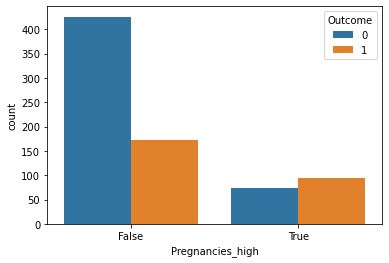

In [26]:
sns.countplot(data=df,x='Pregnancies_high',hue='Outcome')
# -> 임신횟수가 일정이상이 되면 당뇨 발병률이 늘어난다.

# -----

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

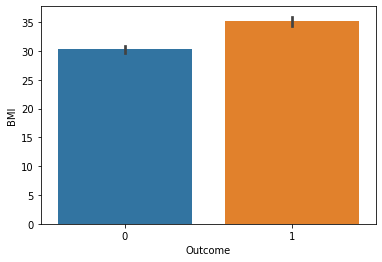

In [27]:
sns.barplot(data=df,x='Outcome',y='BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

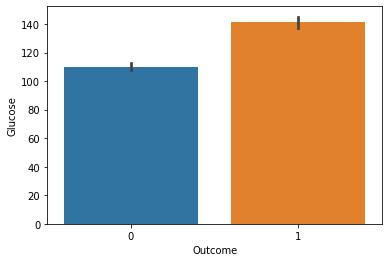

In [28]:
sns.barplot(data=df,x='Outcome',y='Glucose')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

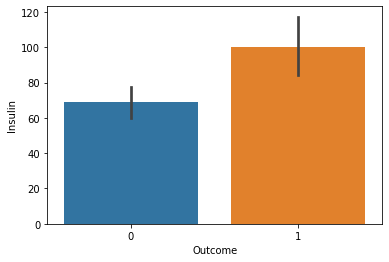

In [30]:
sns.barplot(data=df,x='Outcome',y='Insulin')

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

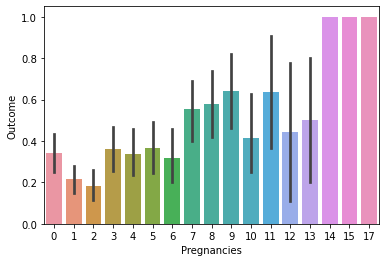

In [31]:
sns.barplot(data=df,x='Pregnancies',y='Outcome')
# -> 자동으로 mean으로 계산

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

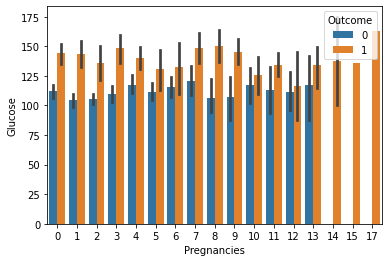

In [32]:
sns.barplot(data=df,x='Pregnancies',y='Glucose',hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

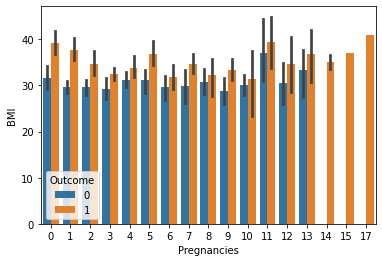

In [34]:
sns.barplot(data=df,x='Pregnancies',y='BMI',hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

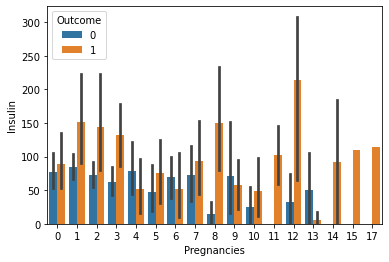

In [35]:
sns.barplot(data=df,x='Pregnancies',y='Insulin',hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

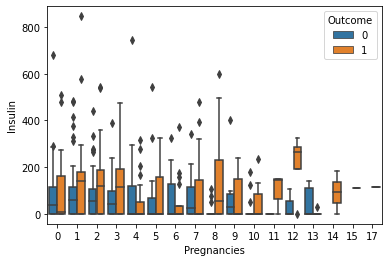

In [36]:
sns.boxplot(data=df,x='Pregnancies',y='Insulin',hue='Outcome')
# -> 그래프가 주저앉아있음. 아마 인슐린=0인 결측치가 많기 때문

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

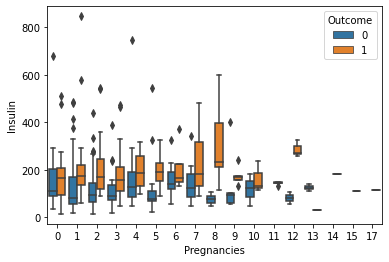

In [37]:
sns.boxplot(data=df[df['Insulin']>0],x='Pregnancies',y='Insulin',hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

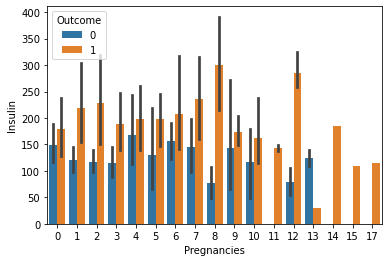

In [38]:
sns.barplot(data=df[df['Insulin']>0],x='Pregnancies',y='Insulin',hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

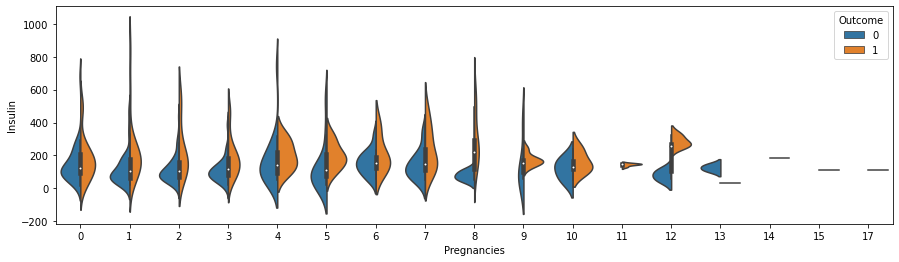

In [39]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0],
               x='Pregnancies',y='Insulin',hue='Outcome',split=True)

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

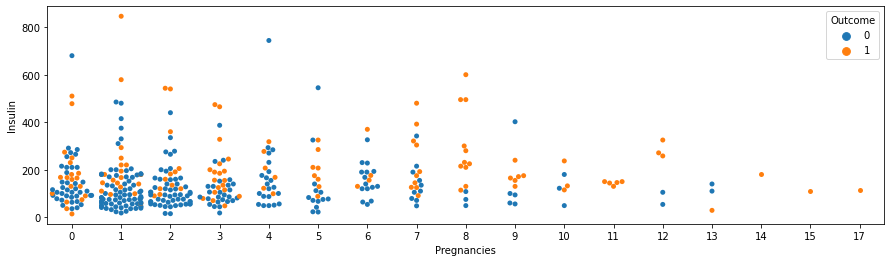

In [40]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0],
               x='Pregnancies',y='Insulin',hue='Outcome')

# -----

In [41]:
df_0=df[df['Outcome']==0]
df_1=df[df['Outcome']==1]

print(df_0.shape,df_1.shape)

(500, 10) (268, 10)


<AxesSubplot:xlabel='Pregnancies'>

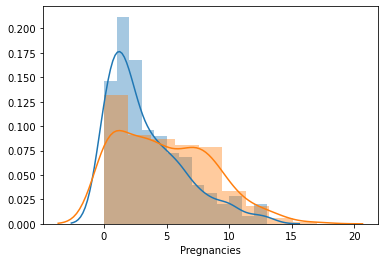

In [42]:
# a는 series 형태의 data를 의미
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

<AxesSubplot:xlabel='Age'>

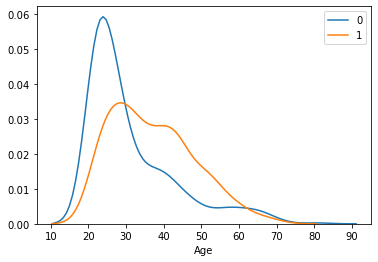

In [45]:
# 나이에 따른 당뇨병 발병 여부를 보자
sns.distplot(df_0['Age'],hist=False,label='0')
sns.distplot(df_1['Age'],hist=False,label='1')

# ------

In [46]:
# 위에 distplot그린것처럼 subplot을 이용해 그래프 한번에 두개 그리기

df['Pregnancies_high']=df['Pregnancies_high'].astype(int)

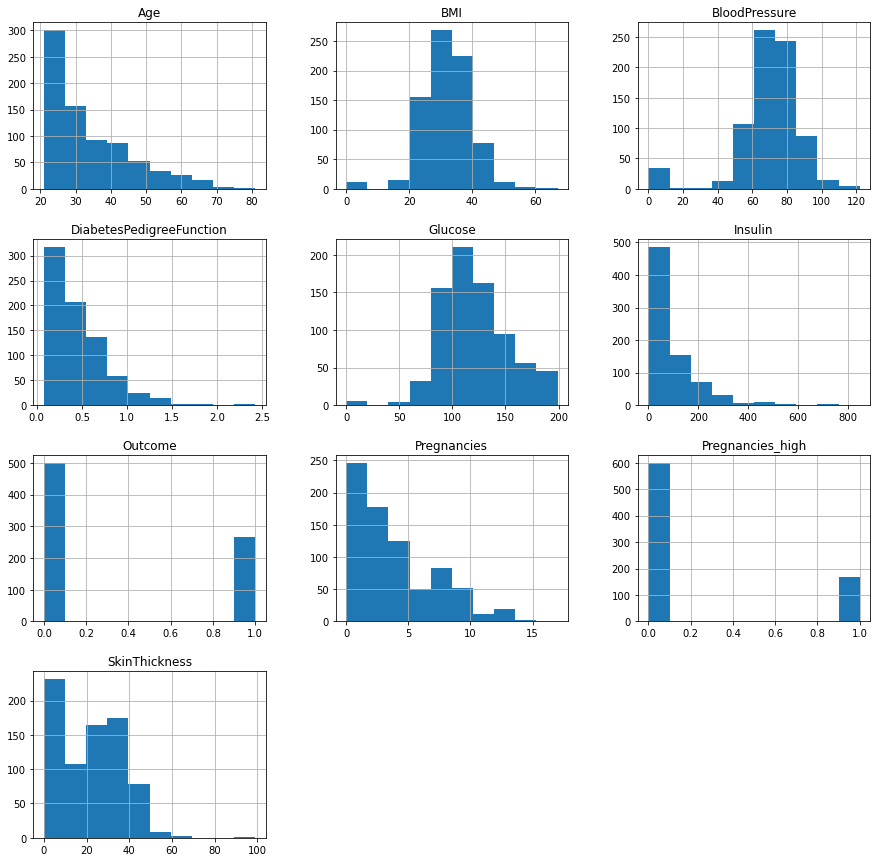

In [48]:
h=df.hist(figsize=(15,15))

In [50]:
col_num=df.columns.shape
col_num

(10,)

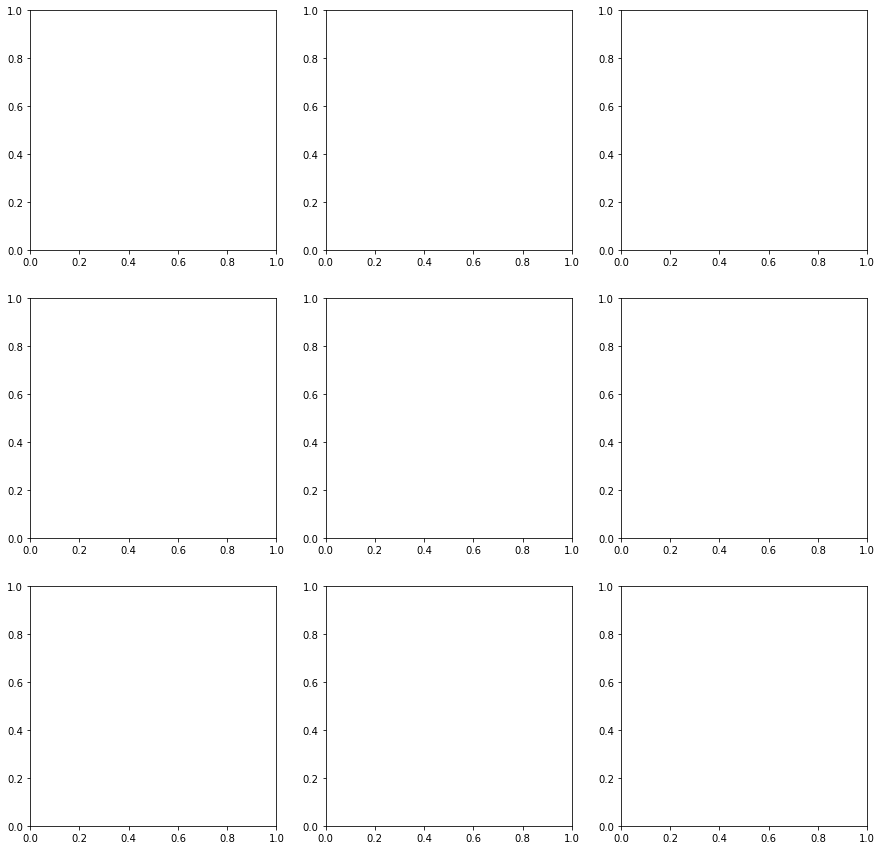

In [51]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))

<AxesSubplot:xlabel='Outcome'>

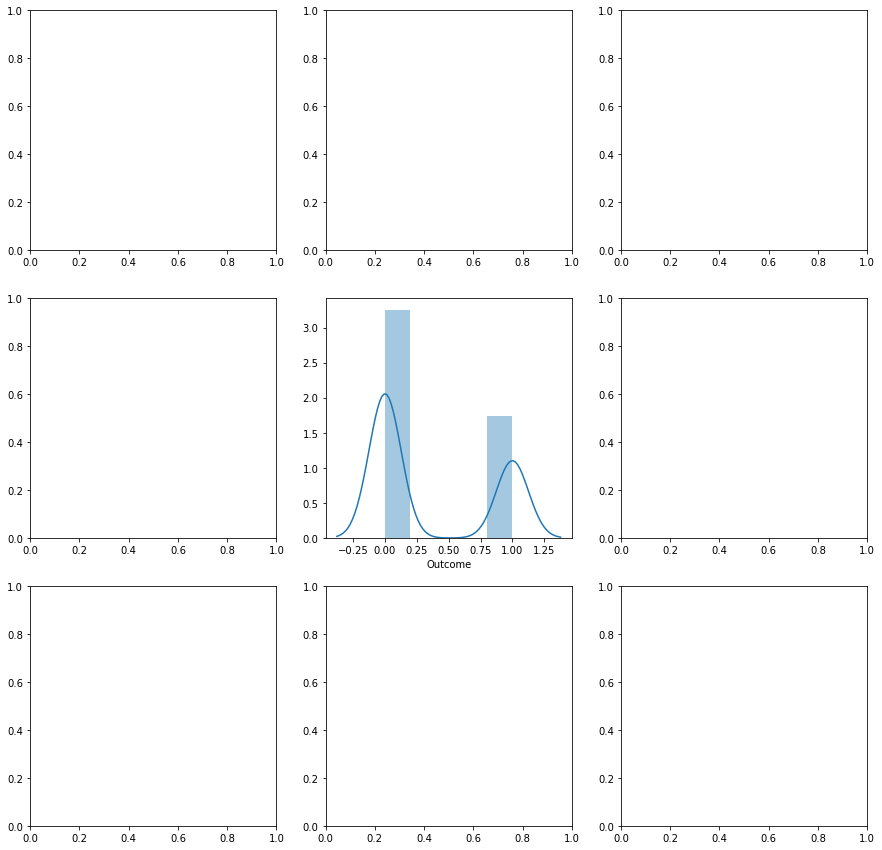

In [52]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))

sns.distplot(df['Outcome'],ax=axes[1][1])

In [53]:
cols=df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

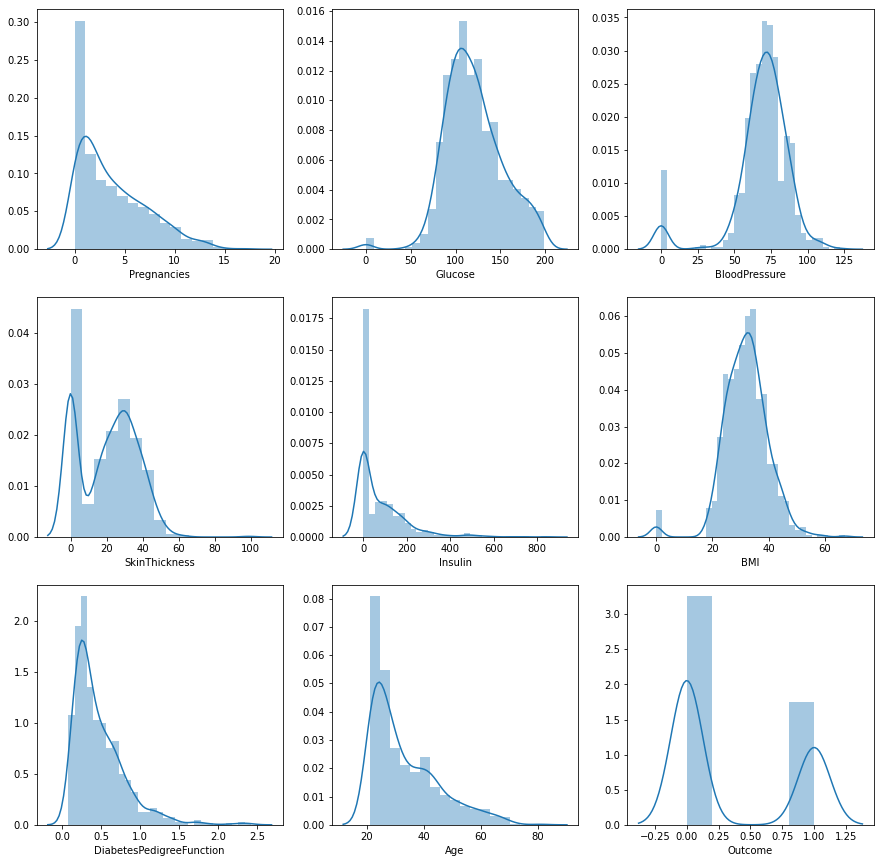

In [55]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i,col_name in enumerate(cols):
    row=i//3
    col=i%3
    sns.distplot(df[col_name],ax=axes[row][col])

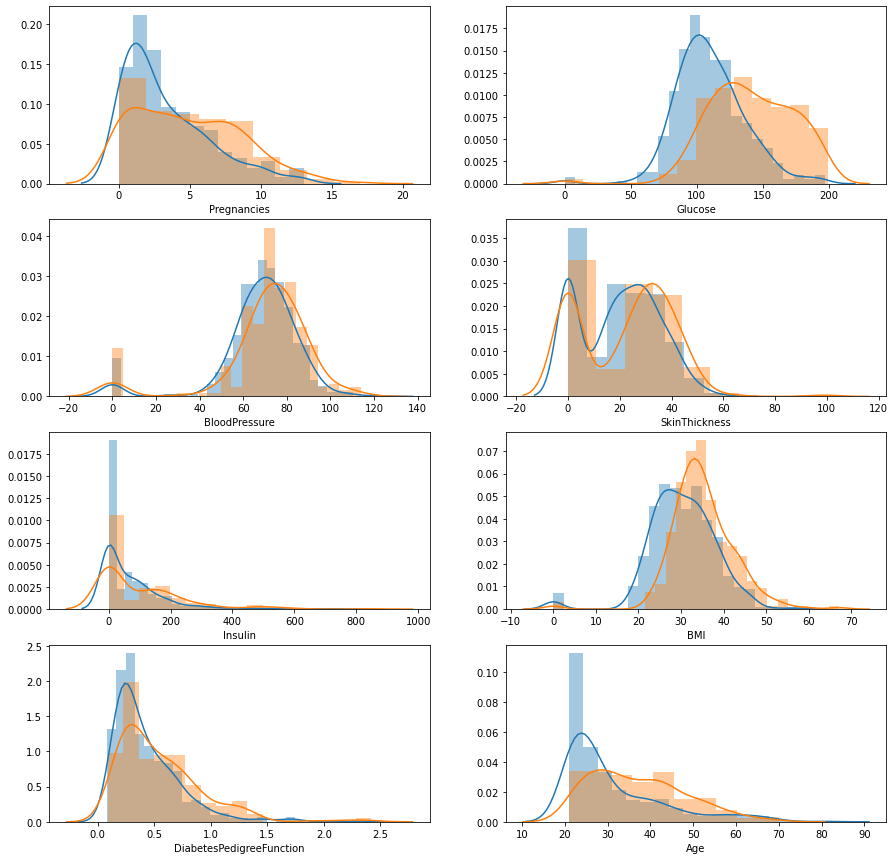

In [57]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,15))

for i,col_name in enumerate(cols[:-1]):
    row=i//2
    col=i%2
    sns.distplot(df_0[col_name],ax=axes[row][col])
    sns.distplot(df_1[col_name],ax=axes[row][col])

# -----

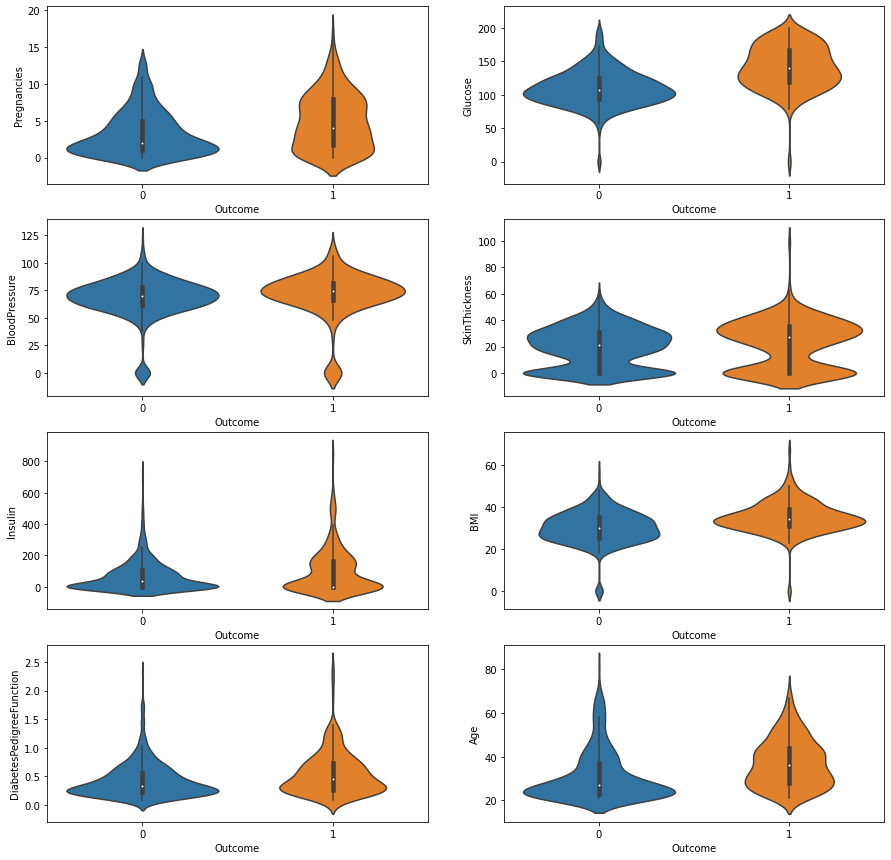

In [58]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,15))

for i,col_name in enumerate(cols[:-1]):
    row=i//2
    col=i%2
    sns.violinplot(data=df,x='Outcome',y=col_name,ax=axes[row][col])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

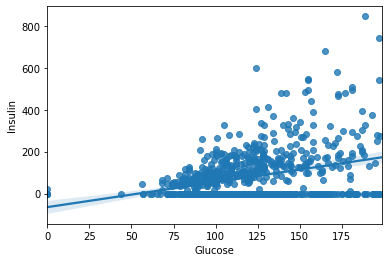

In [59]:
# 상관계수가 높은 두 변수에 대해 시각화
sns.regplot(data=df,x='Glucose',y='Insulin')
# insulin 0인 값이 많음

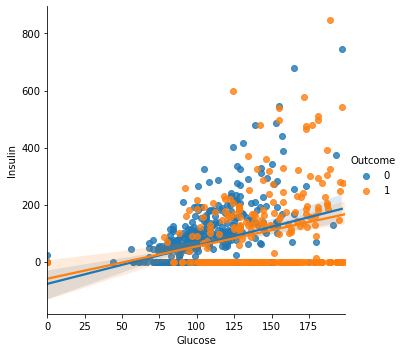

In [60]:
sns.lmplot(data=df,x='Glucose',y='Insulin',hue='Outcome')

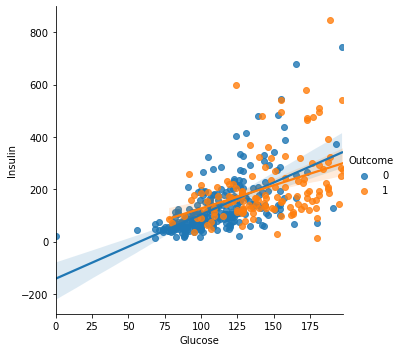

In [61]:
sns.lmplot(data=df[df['Insulin']>0],x='Glucose',y='Insulin',hue='Outcome')

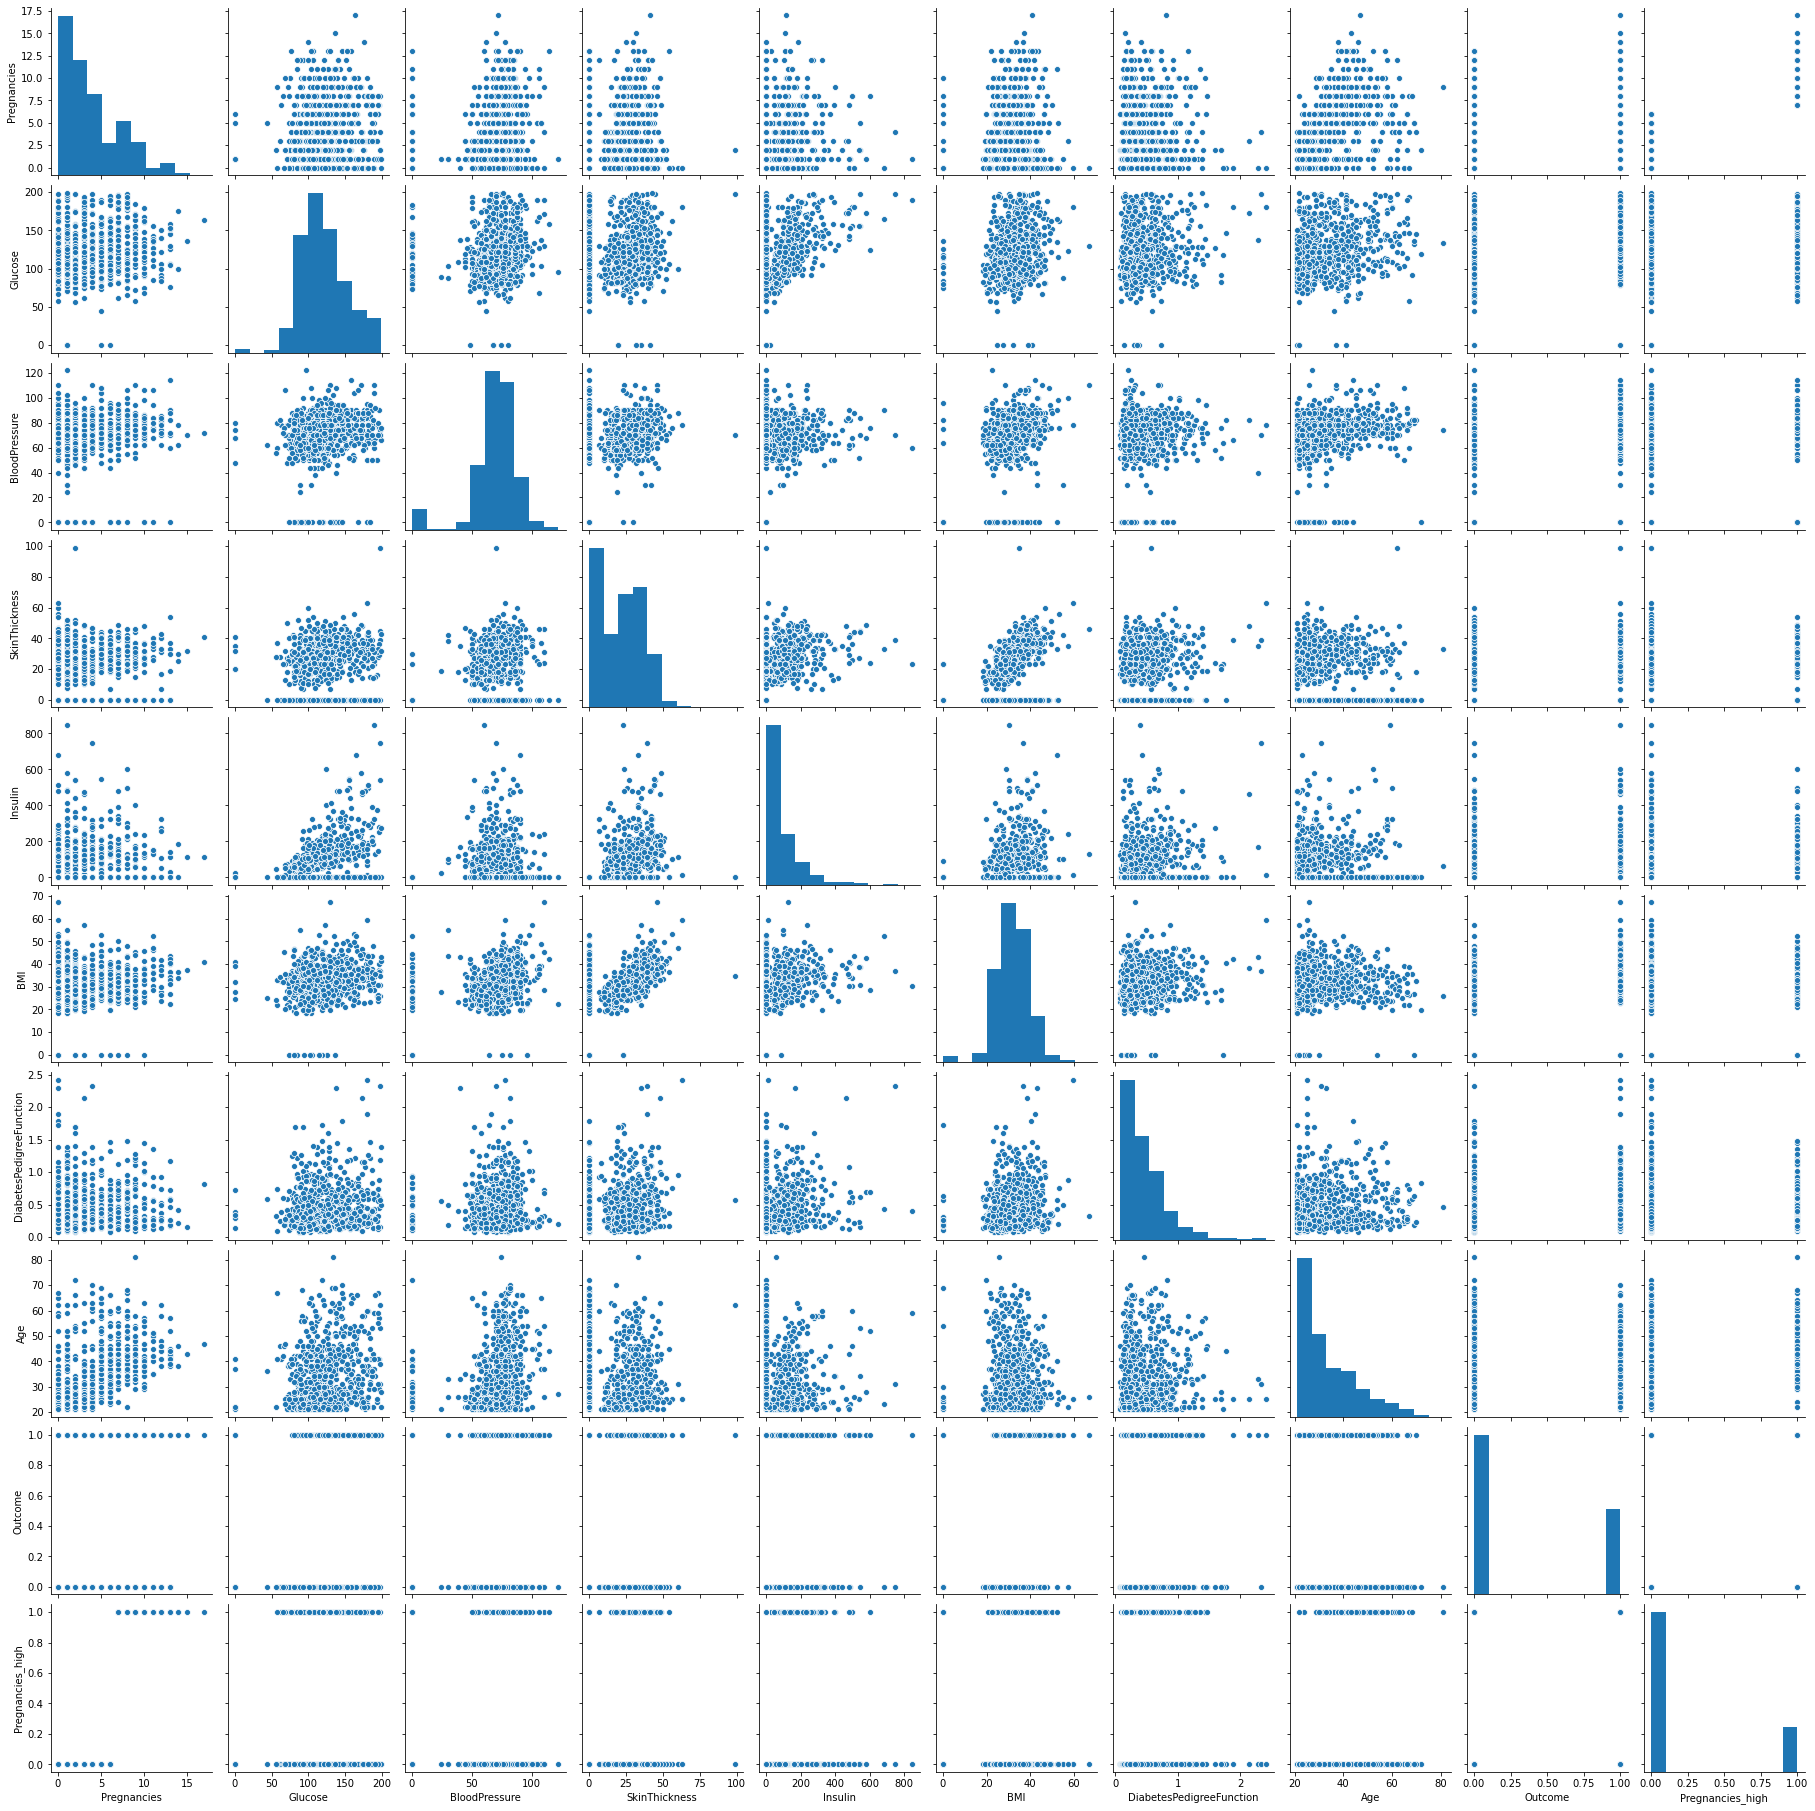

In [62]:
sns.pairplot(df)

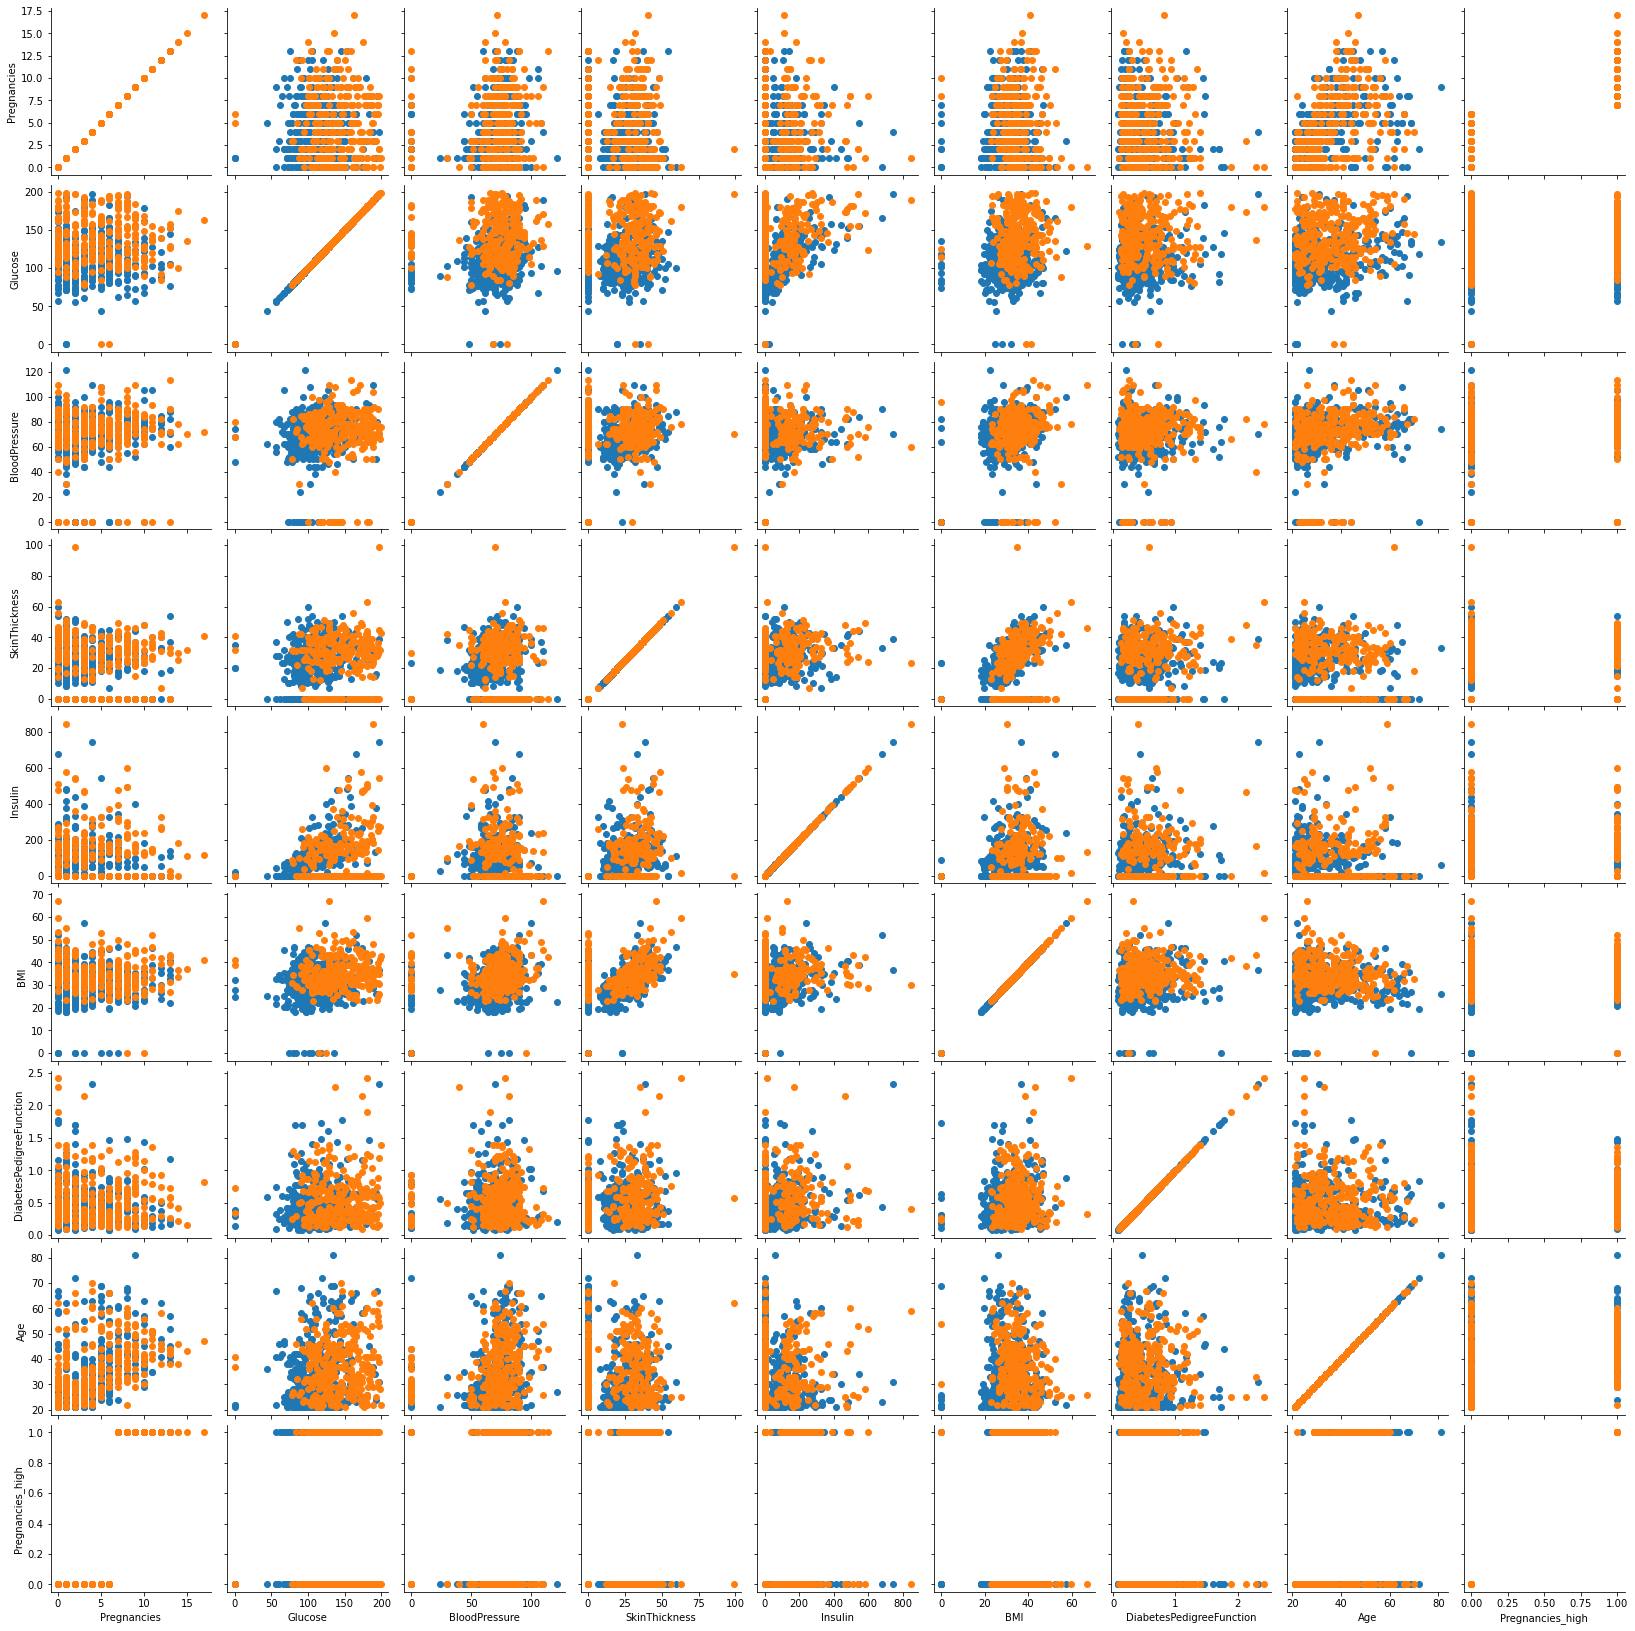

In [63]:
# pairgrid를 통해 모든 변수에 대해 outcome에 따른 scatterplot을 그려봄
g=sns.PairGrid(df,hue='Outcome')
g.map(plt.scatter)

# -----

In [64]:
# 상관분석
# 일단 결측치 처리 X
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


In [65]:
df_corr=df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<AxesSubplot:>

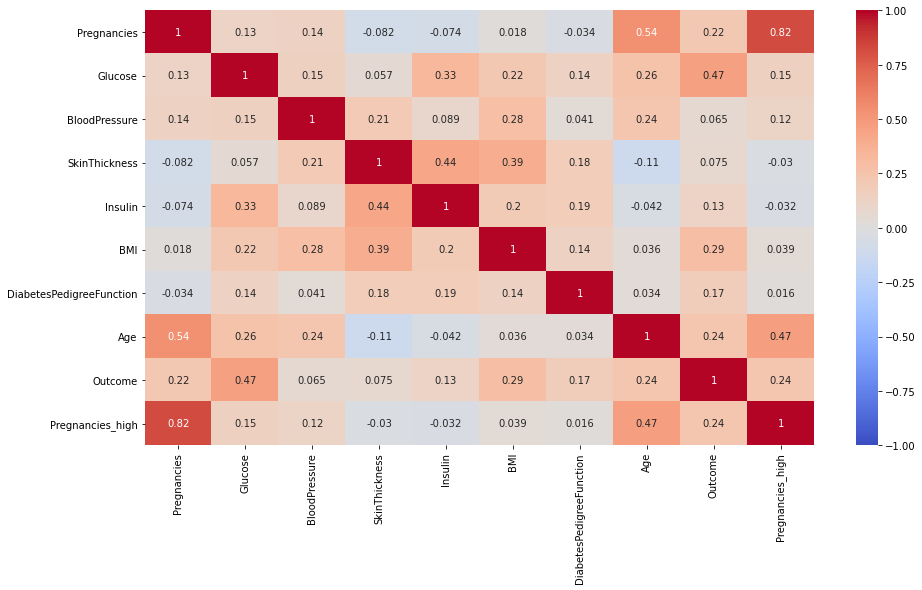

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr,annot=True,vmax=1,vmin=-1,cmap='coolwarm')

In [74]:
# 결측치 처리(0->nan)
df_matrix=df.iloc[:,:-2].replace(0,np.nan)
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [75]:
df_matrix['Outcome']=df['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [76]:
df_corr=df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

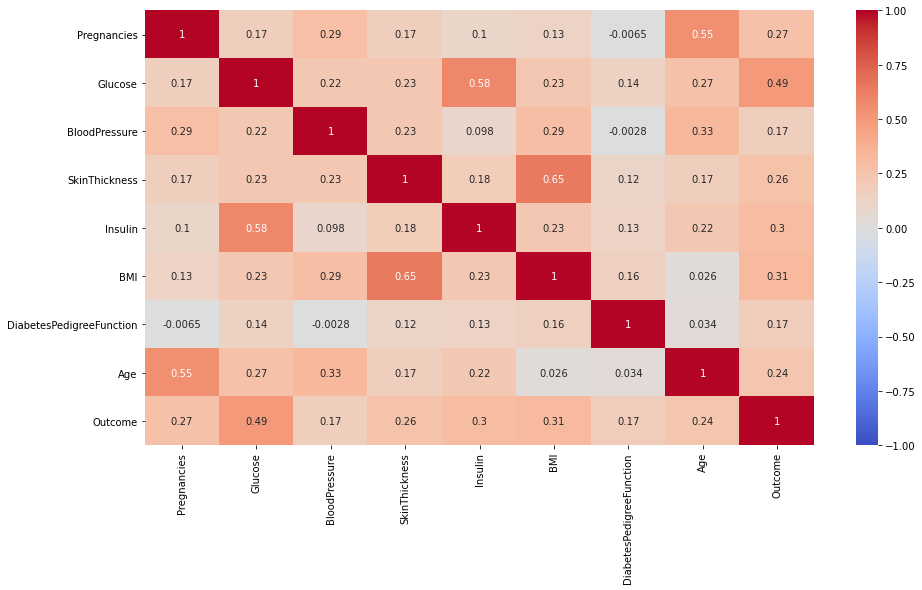

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr,annot=True,vmax=1,vmin=-1,cmap='coolwarm')

In [78]:
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

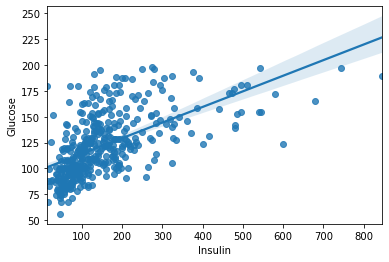

In [79]:
# 상관계수가 높은 변수끼리 보기

sns.regplot(data=df_matrix,x='Insulin',y='Glucose')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

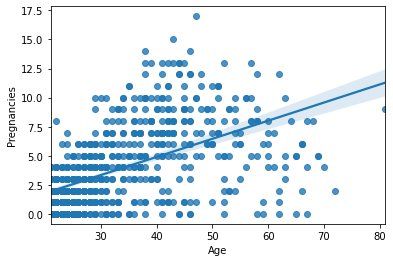

In [80]:
sns.regplot(data=df,x='Age',y='Pregnancies')

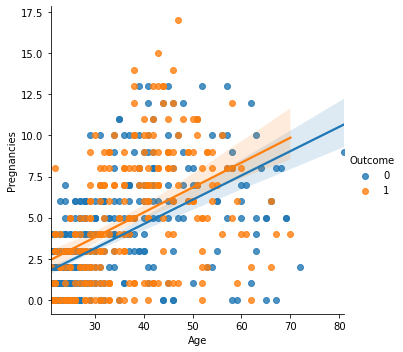

In [81]:
sns.lmplot(data=df,x='Age',y='Pregnancies',hue='Outcome')

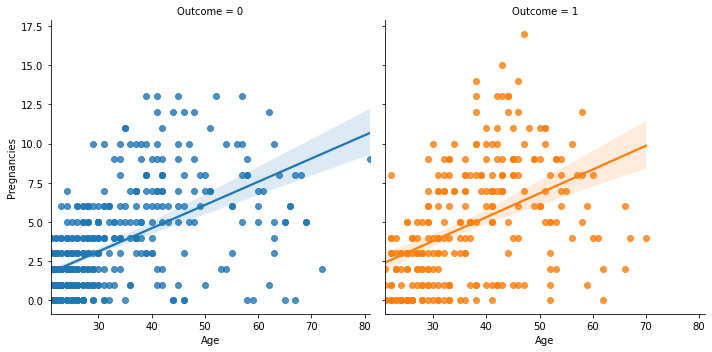

In [82]:
sns.lmplot(data=df,x='Age',y='Pregnancies',hue='Outcome',col='Outcome')